In [1]:
#%% - Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#configs
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200

In [4]:
df = pd.read_csv('./data/Insurance.csv')

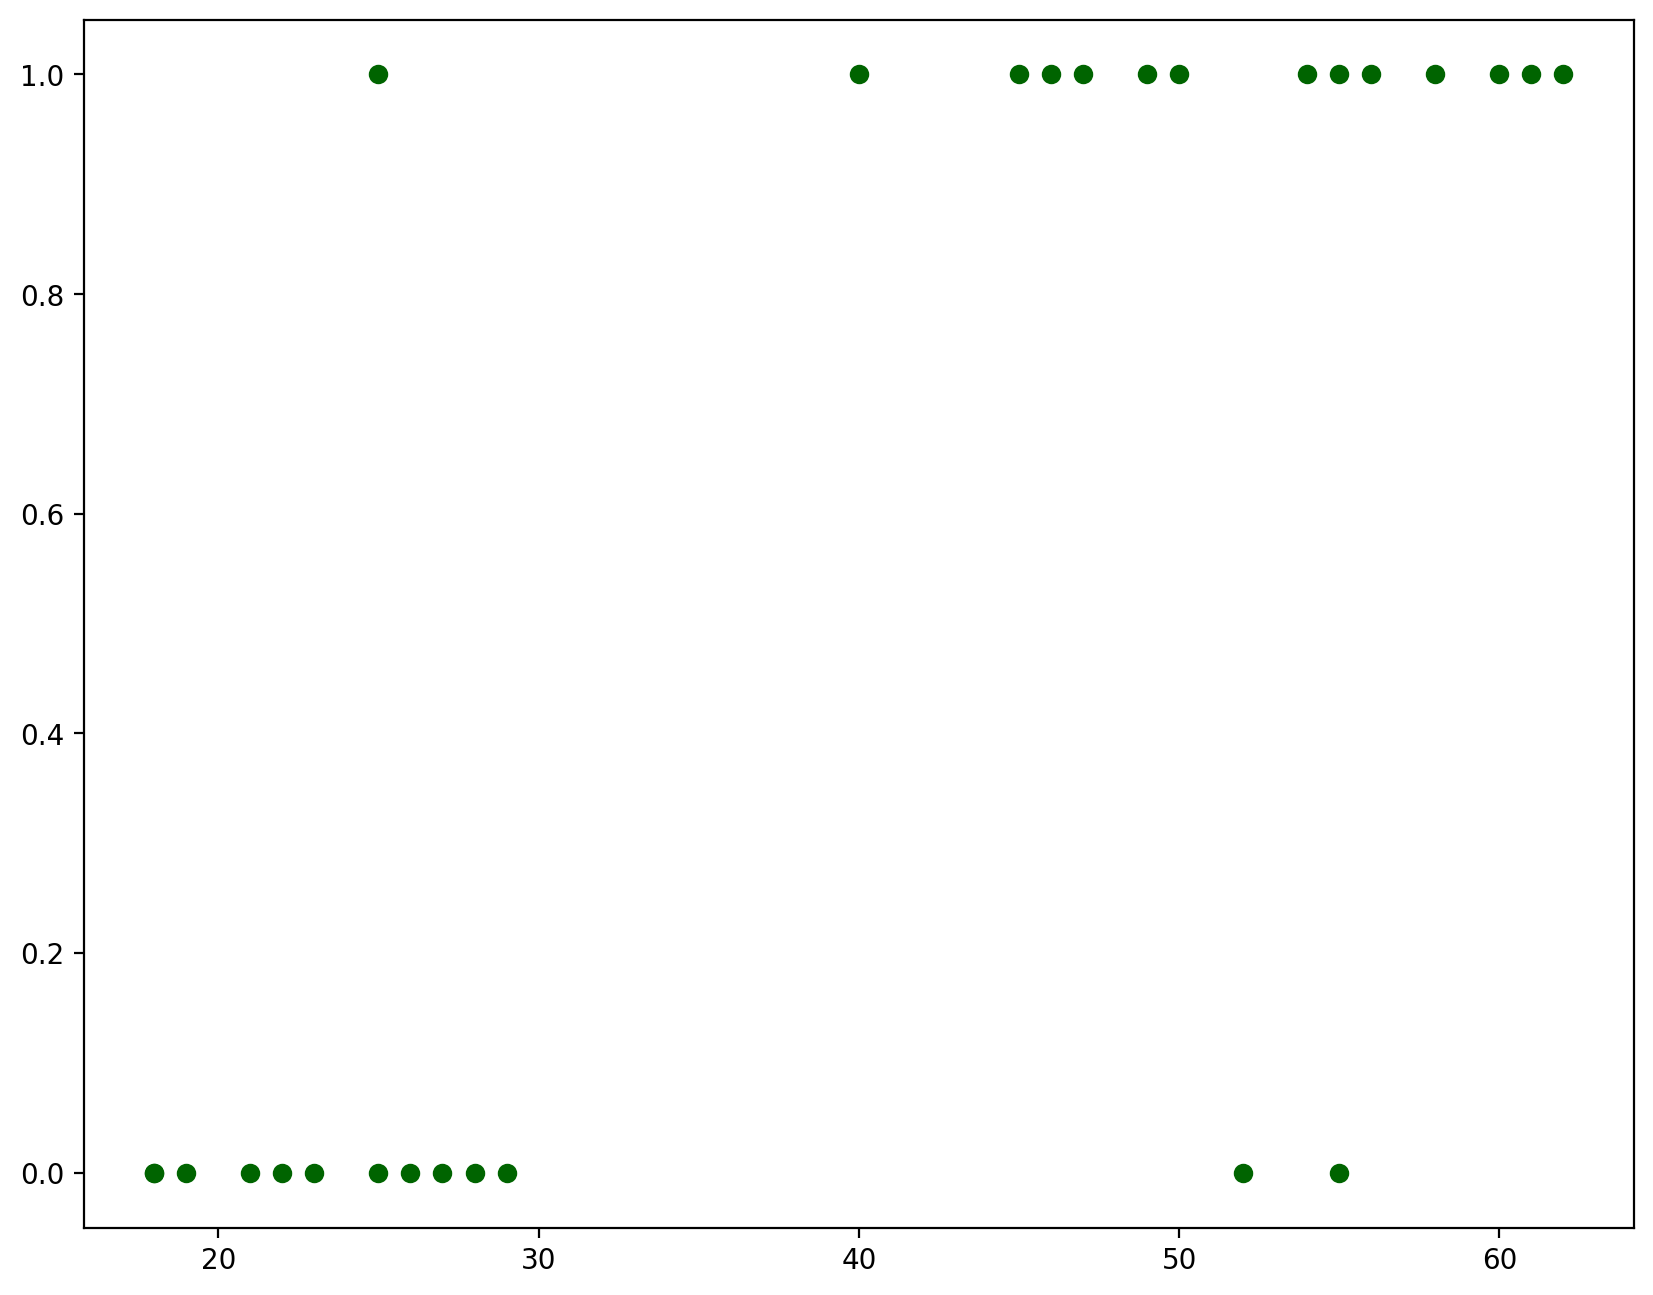

In [5]:
plt.scatter(df.age, df['bought_insurance'], color = 'darkgreen', marker = 'o')


In [58]:
#split train/test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size =  0.1)

In [11]:
#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [17]:
intercept = model. intercept_
coefs = model.coef_
print(intercept, coefs)
score = model.score(X_train, y_train)
print(score)
prob_matrix = model.predict_proba(X_train)

[-4.84456521] [[0.12607099]]
0.875


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
cm = confusion_matrix(y_train, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.86      0.92      0.89        13

    accuracy                           0.88        24
   macro avg       0.88      0.87      0.87        24
weighted avg       0.88      0.88      0.87        24



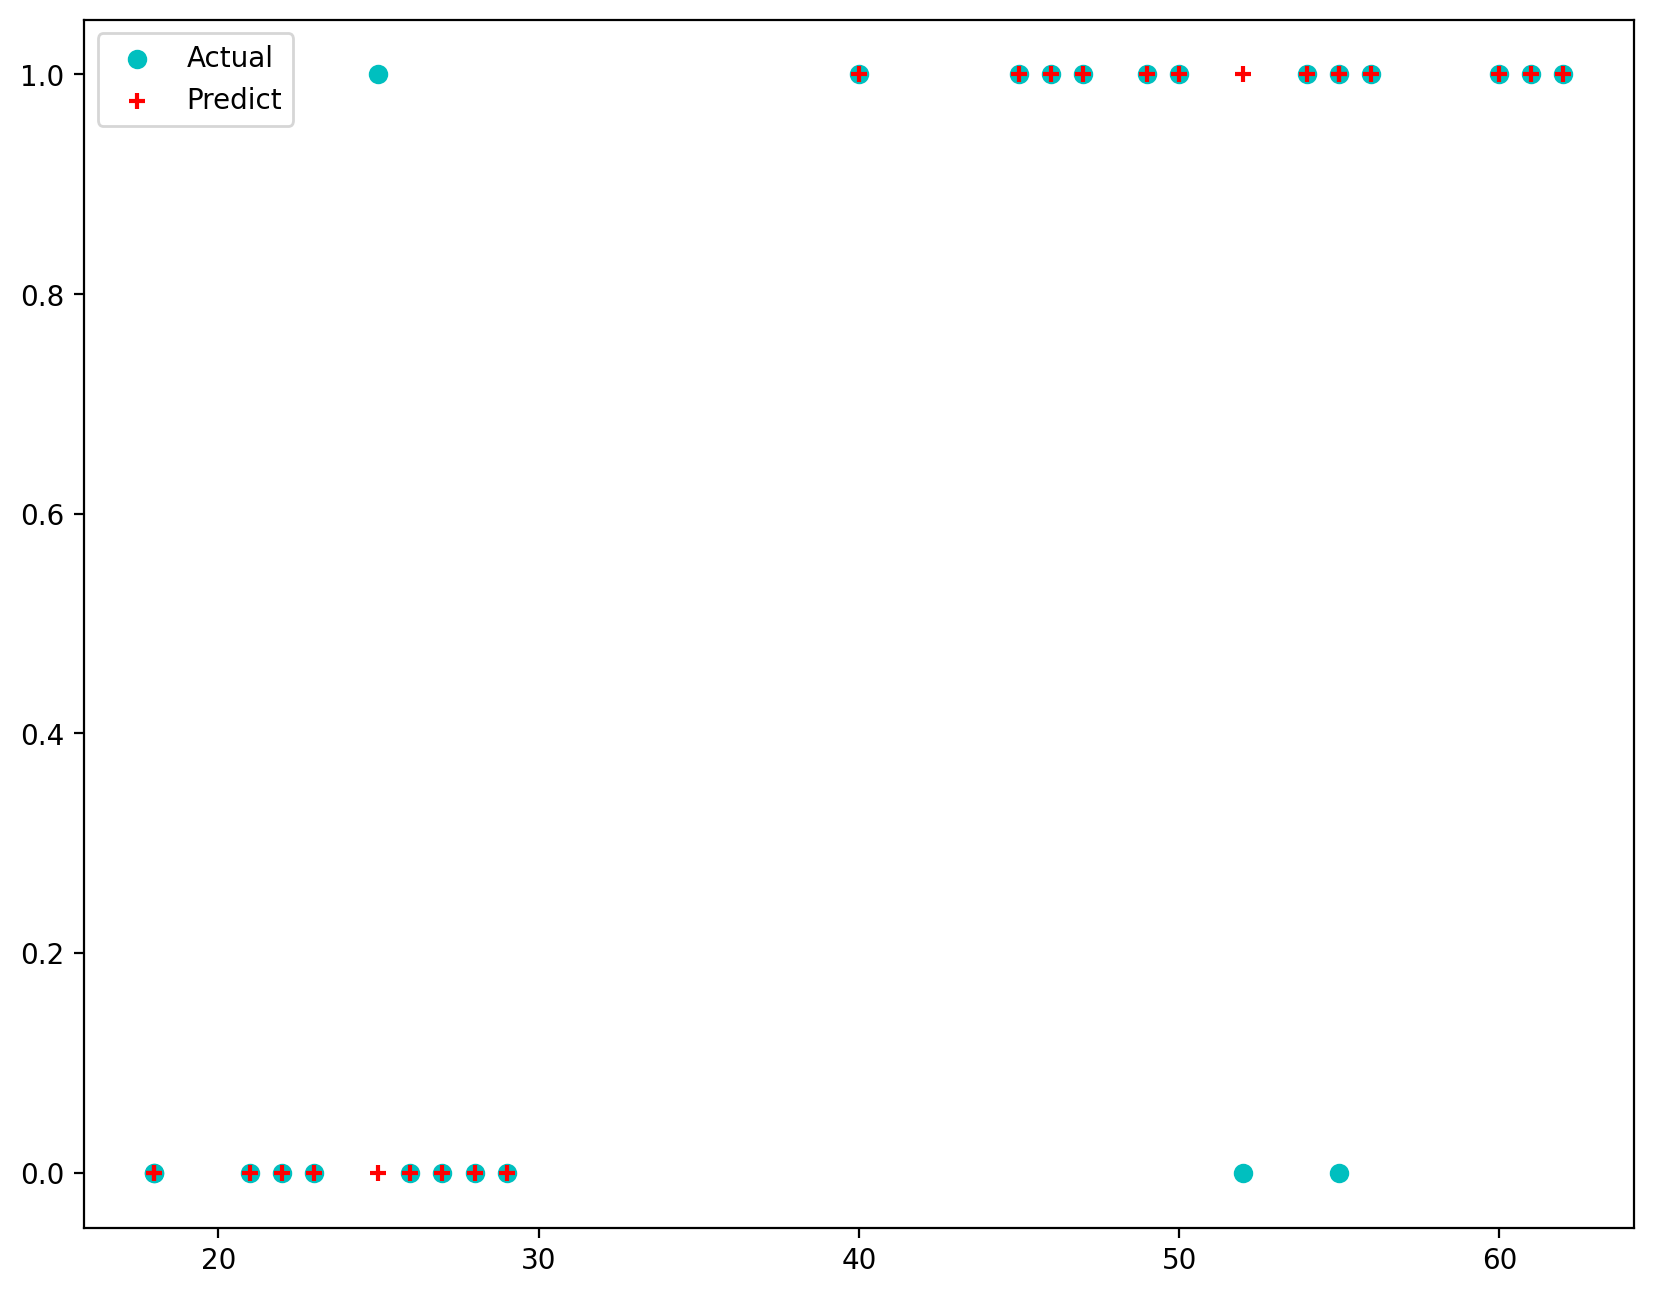

In [20]:
plt.scatter(X_train, y_train, color = 'c', marker = 'o', label = 'Actual')
plt.scatter(X_train, y_pred, color = 'r', marker = '+', label = 'Predict')
plt.legend()

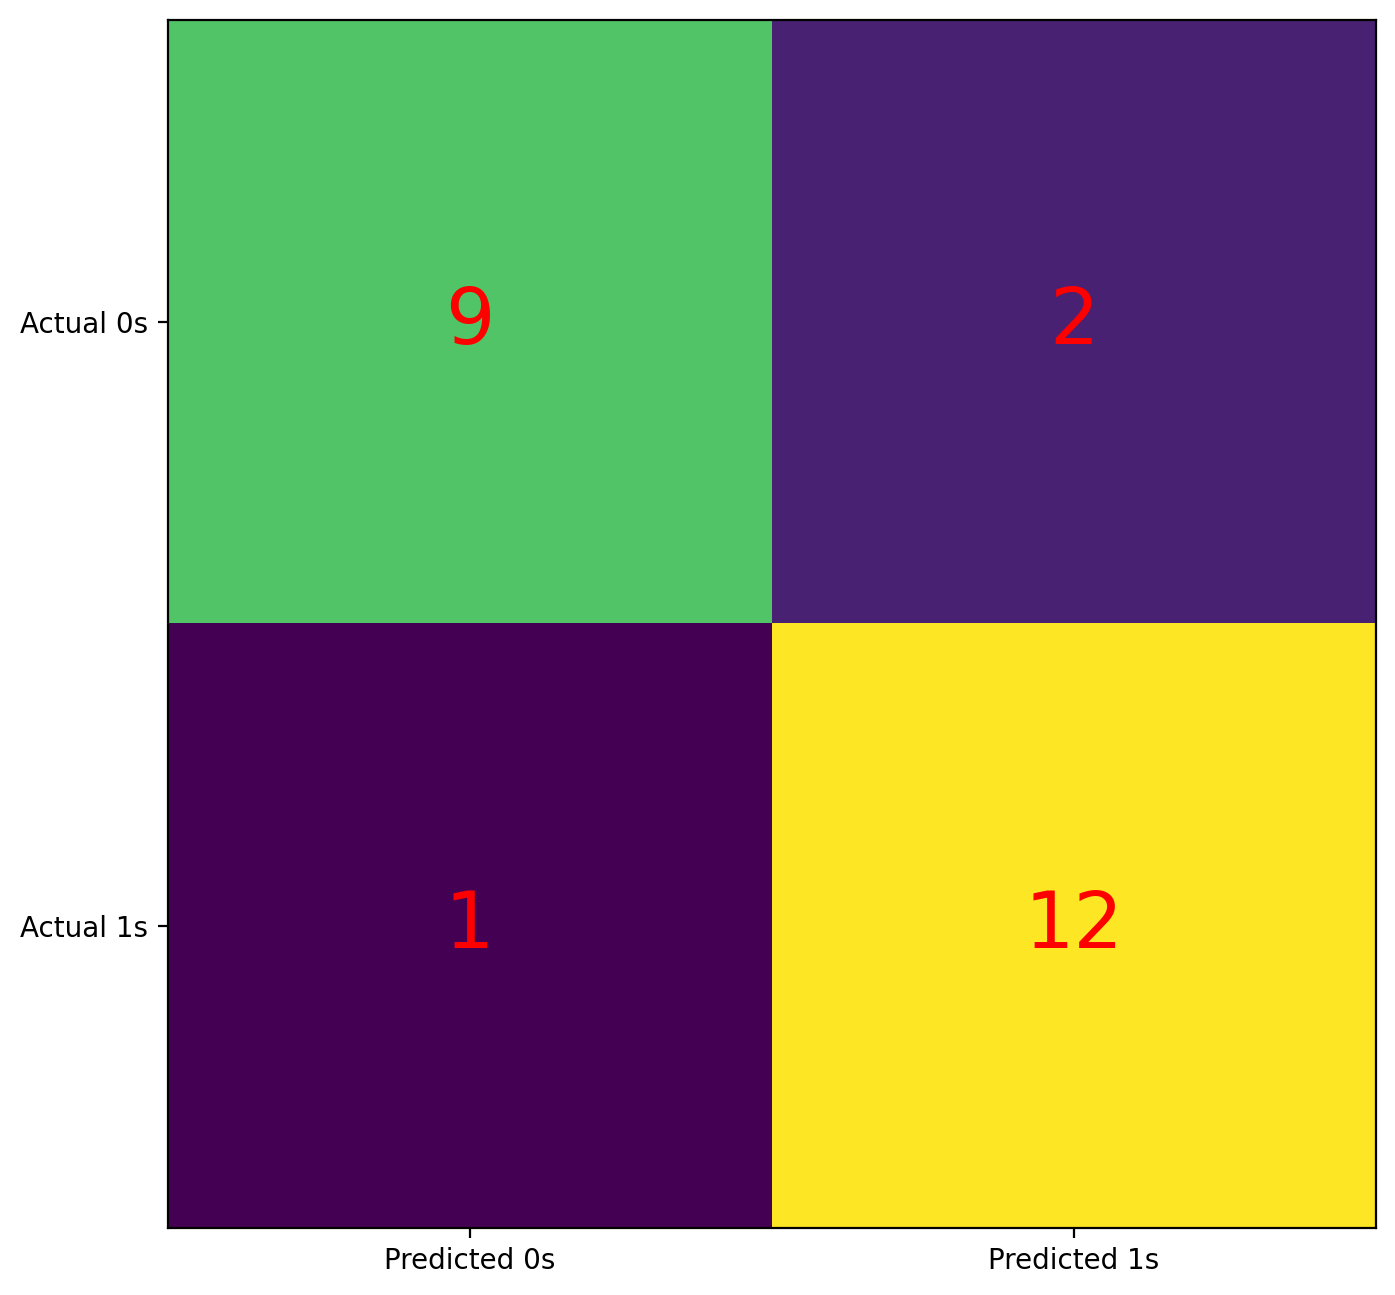

In [31]:
fig, ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks = (0,1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0,1), ticklabels = ('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha = 'center', va = 'center', color = '#FF0000', fontsize = '28')

In [38]:
#Predict
pre_values = model.predict(X_test)
print(pre_values)
print(y_test)
pre_score = model.score(X_test, y_test)
pre_prob_matrix = model.predict_proba(X_test)
print(pre_score)
print(pre_prob_matrix)

[0 0 1]
1     0
18    0
17    1
Name: bought_insurance, dtype: int64
1.0
[[0.84459079 0.15540921]
 [0.92050413 0.07949587]
 [0.07816444 0.92183556]]


In [54]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [55]:
def prediction_func(age, inter, coef):
    x = inter + coef*age
    return sigmoid(x)

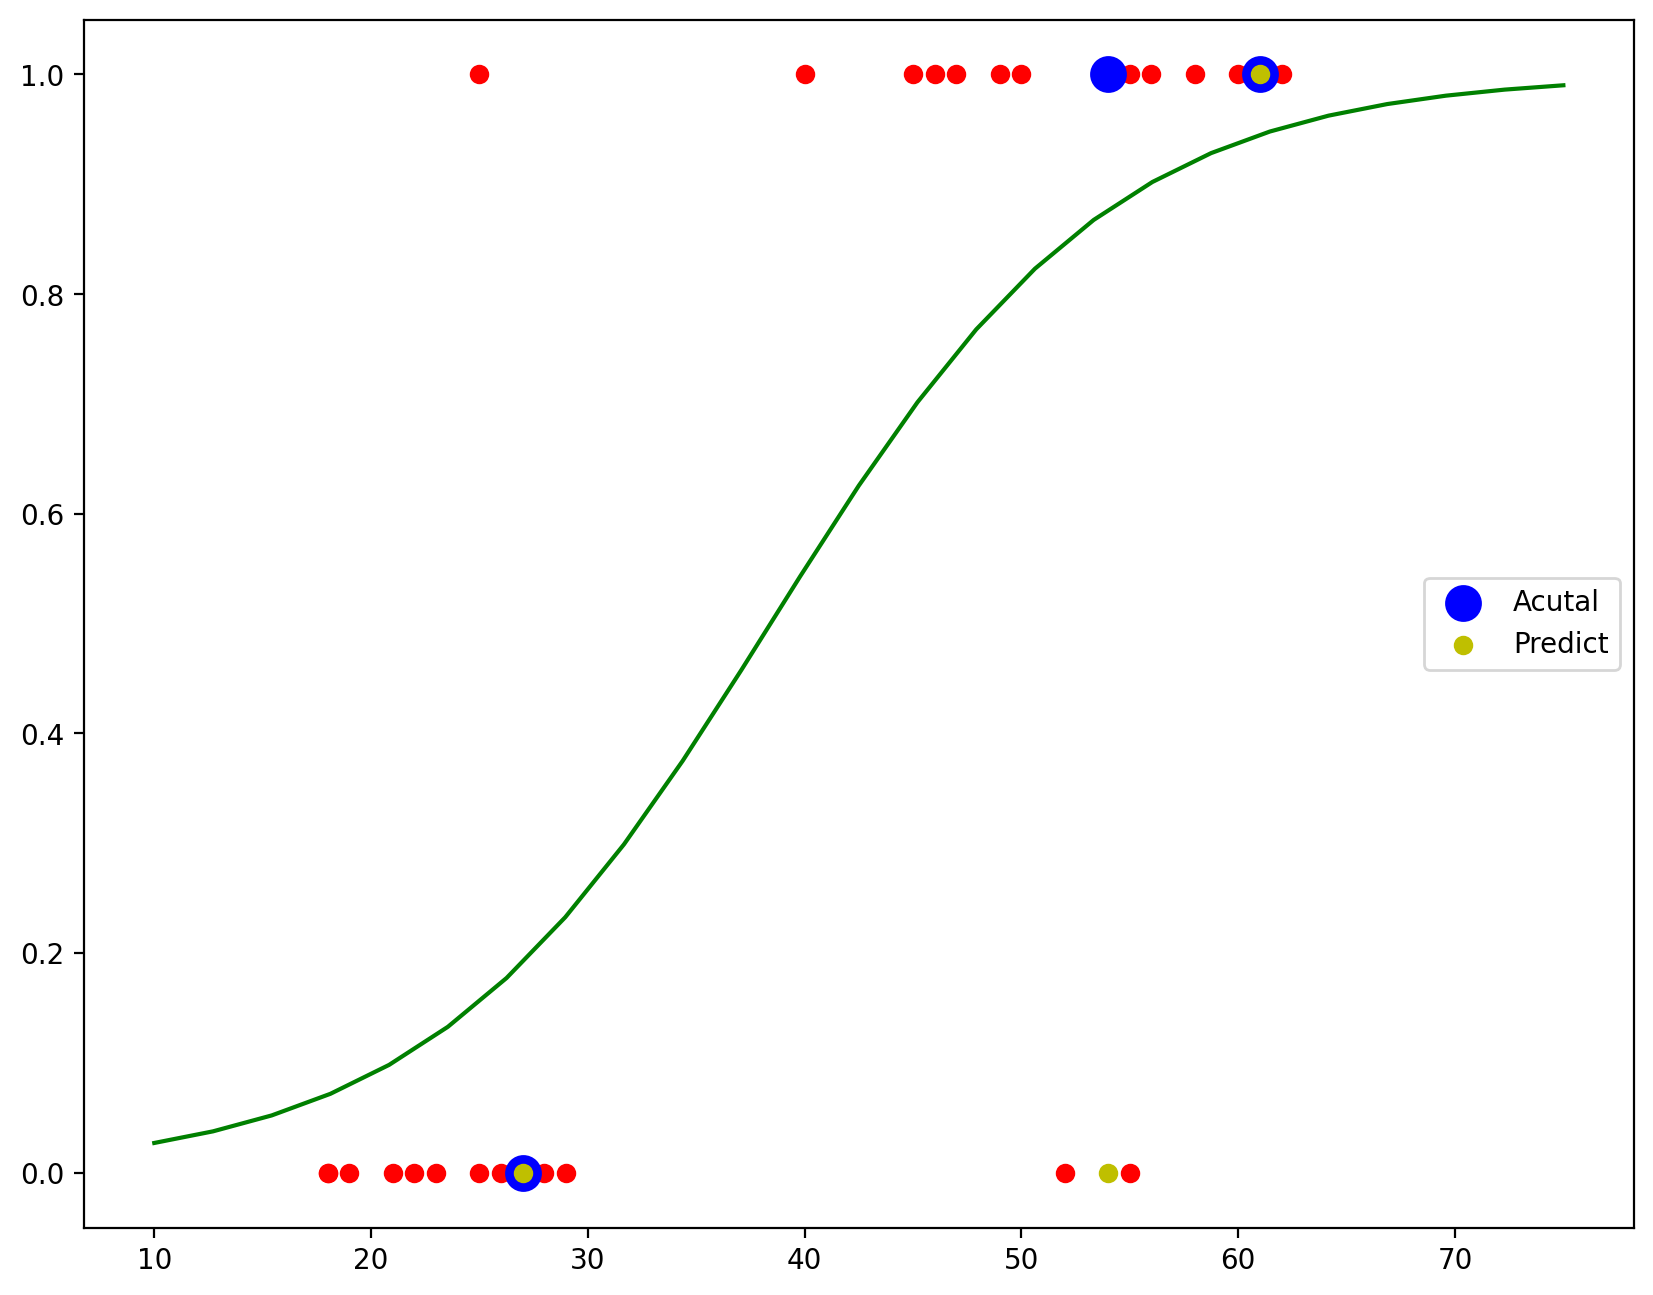

In [69]:
#Draw sigmoid plot
plt.scatter(X_train, y_train,color = 'r', marker= 'o')
x_test = np.linspace(10,75,25)
sigs = []
for item in x_test:
    sigs.append(prediction_func(item, intercept[0], coefs[0][0]))
plt.plot(x_test, sigs, color = 'g')
plt.scatter(X_test, y_test,color = 'b', label = 'Acutal', s =150)
plt.scatter(X_test, pre_values, color = 'y', label = 'Predict')
plt.legend(loc = 'center right')

In [72]:
pred_prob = prediction_func (56,intercept[0], coefs[0][0])